## Analysis Notebook for the "Bomberman Agents together strong!" AI

#### by Jonas Drotleff and Noah Wach

In this notebook we want to analyze our agents performance to better understand the learning process. We decided to save the number of collected coins, survived steps and destroyed crates for each round. Additionally we saved the mean reward per round.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

First we need to load and extract the data.

In [27]:
crate_coins_survival = np.load("agent_code/strong_agent/crates_coins.npy")
reward = np.load("agent_code/strong_agent/scores.npy")[:, 0]

x_crate_coins_survival = np.arange(crate_coins_survival.shape[0])+1
x_reward = np.arange(reward.shape[0])+1

In [28]:
def movingaverage(interval, window_size):
    """
    Function that calculates the moving average for a given data set
    """
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

To better visualize the agents performance over time we decided to plot the moving average over a window of $70$ data points and fit a polynomial.

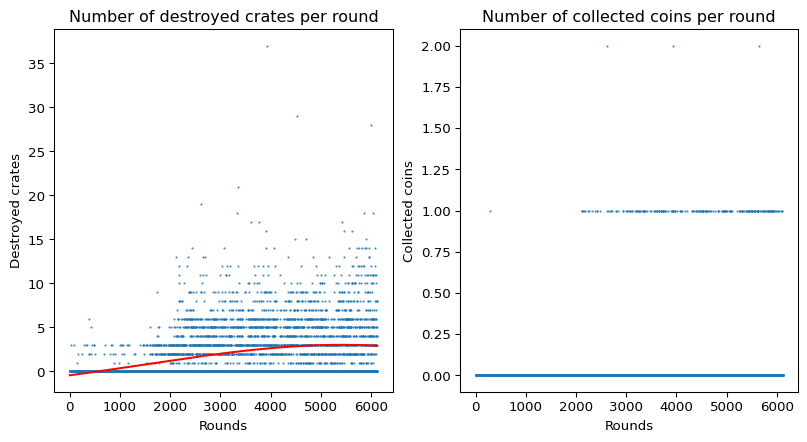

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=96)

axs[0].plot(x_crate_coins_survival, crate_coins_survival[:, 0], ".", markersize=1)
axs[0].set_title("Number of destroyed crates per round")
axs[0].set_ylabel("Destroyed crates")
axs[0].set_xlabel("Rounds")


axs[1].plot(x_crate_coins_survival, crate_coins_survival[:, 1], ".", markersize=1)
axs[1].set_title("Number of collected coins per round")
axs[1].set_ylabel("Collected coins")
axs[1].set_xlabel("Rounds")

z = np.polyfit(x_crate_coins_survival, crate_coins_survival[:, 0], 3)
p = np.poly1d(z)
axs[0].plot(x_crate_coins_survival,p(x_crate_coins_survival), "r")

Mean reward over the last 200 steps:-10.13


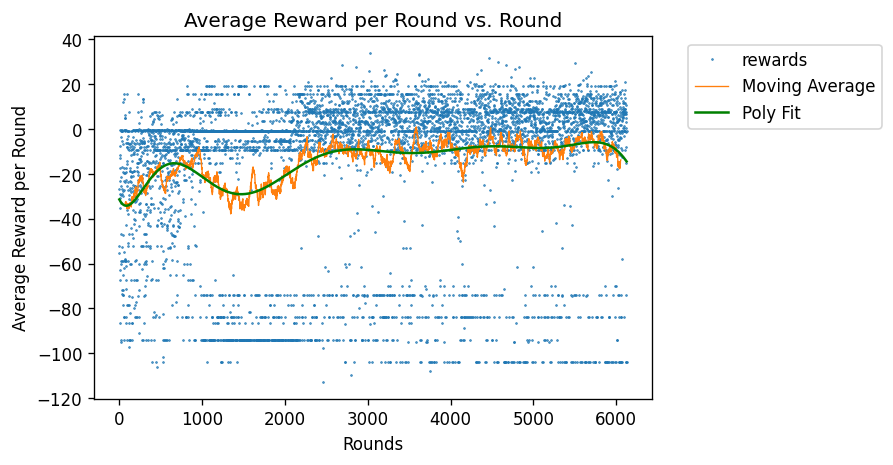

In [30]:
window_size = 70
last_steps = 200
reward_average = movingaverage(reward, window_size)
print(f"Mean reward over the last {last_steps} steps:{round(reward[-last_steps:].mean(), 2)}")

plt.figure(dpi=120)

plt.title("Average Reward per Round vs. Round")
plt.xlabel("Rounds")
plt.ylabel("Average Reward per Round")
plt.plot(x_reward, reward, ".", markersize=1, label="rewards")
plt.plot(x_reward[window_size:-window_size], reward_average[window_size:-window_size], label="Moving Average", linewidth=.8)
plt.savefig("performance_b.pdf", bbox_inches='tight', dpi=288)
#plt.axhline(y=reward_average[int(window_size/2)], color='r', linestyle='--')
z = np.polyfit(x_reward, reward, 10)
p = np.poly1d(z)
plt.plot(x_reward,p(x_reward), "g", label="Poly Fit")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')